https://stepik.org/lesson/1370125/step/8

Число ошибок на обучающей выборке: 9 при композиции 10 решающих деревьев


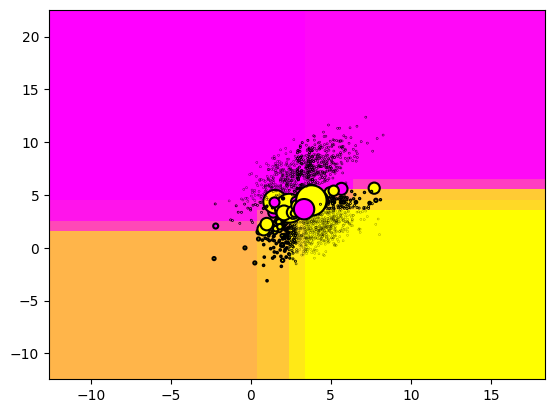

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(0)
n_feature = 2

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [4, 2]
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2 = 1000, 1200
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

XN = len(x_train)    # длина обучающей выборки
'''ЗДЕСЬ ЗАДАЁМ ЧИСЛО МОДЕЛЕЙ И ГЛУБИНУ ДЕРЕВА'''
T = 10                  # число алгоритмов в композиции
max_depth = 3           # максимальная глубина решающих деревьев
w = np.ones(XN) / XN    # начальные значения весов для объектов выборки
algs = []               # список из полученных алгоритмов
alfa = []               # список из вычисленных весов для композиции

for n in range(T):
    # создаем и обучаем решающее дерево с весами объектов w
    algs.append(DecisionTreeClassifier(criterion='gini', max_depth=max_depth))
    algs[n].fit(x_train, y_train, sample_weight=w)
    predicted = algs[n].predict(x_train) # формируем прогнозы полученного дерева по обучающей выборке
    N = np.sum(np.abs(y_train - predicted) / 2 * w)   # вычисляем долю неверных классификаций
    alfa.append(0.5 * np.log((1 - N) / N) if N != 0 else np.log((1-1e-8) / 1e-8) ) # вычисляем вес для текущего алгоритма
    # пересчитываем веса объектов выборки
    w = w * np.exp(-1 * alfa[n] * y_train * predicted)
    w = w / np.sum(w)

# вычисляем число ошибок классификации на основе полученной композиции
# Прогноз
predicted = alfa[0] * algs[0].predict(x_test)
for n in range(1, T):
    predicted += alfa[n] * algs[n].predict(x_test)
predict = np.sign(predicted)

# Качество
Q = np.sum(y_test != predict)
# print(f"Число ошибок на обучающей выборке: {Q} при композиции {T} решающих деревьев")

# отображаем полученные результаты классификации
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 10, data[:, 0].max() + 10
    y_min, y_max = data[:, 1].min() - 10, data[:, 1].max() + 10
    return np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

xx, yy = get_grid(x_test)
predicted = alfa[0] * algs[0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
for n in range(1, T):
    predicted += alfa[n] * algs[n].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='spring', shading='auto')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=5000 * w, cmap='spring', edgecolors='black', linewidth=1.5)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(0)
n_feature = 2

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [4, 2]
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2 = 1000, 1200
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)
T = 10
max_depth = 3
b_t = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
w = np.ones(len(x_train)) / len(x_train)
algs, alpha = [], []

for t in range(T):
    algs.append(DecisionTreeClassifier(criterion='gini', max_depth=max_depth))
    algs[t].fit(x_train, y_train, sample_weight=w)

    predict = algs[t].predict(x_train)
    N = np.sum((y_train != predict) * w)
    alpha.append(0.5 * np.log((1 - N) / N))
    w = w * np.exp(-alpha[t] * y_train * predict)
    w /= np.sum(w)

predict = np.sign(np.sum([alpha[t] * algs[t].predict(x_test) for t in range(T)], axis=0))

Q = np.sum(np.abs(y_test - predict) / 2)
Q

array([-1., -1., -1., ...,  1.,  1.,  1.])